In [15]:
import numpy as np
import scipy.stats as stats
import xarray as xr
import ipdb
import pickle as pkl
import pandas as pd
from utils import constants as cnst, u_statistics as ustats
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


/tmp/ipykernel_12553/833951114.py:8: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


Loads bulk statistics derived from having cut out storms (saved in MCSfiles), OBS includes rainfall from TRMM radar

In [3]:
from utils import u_plot

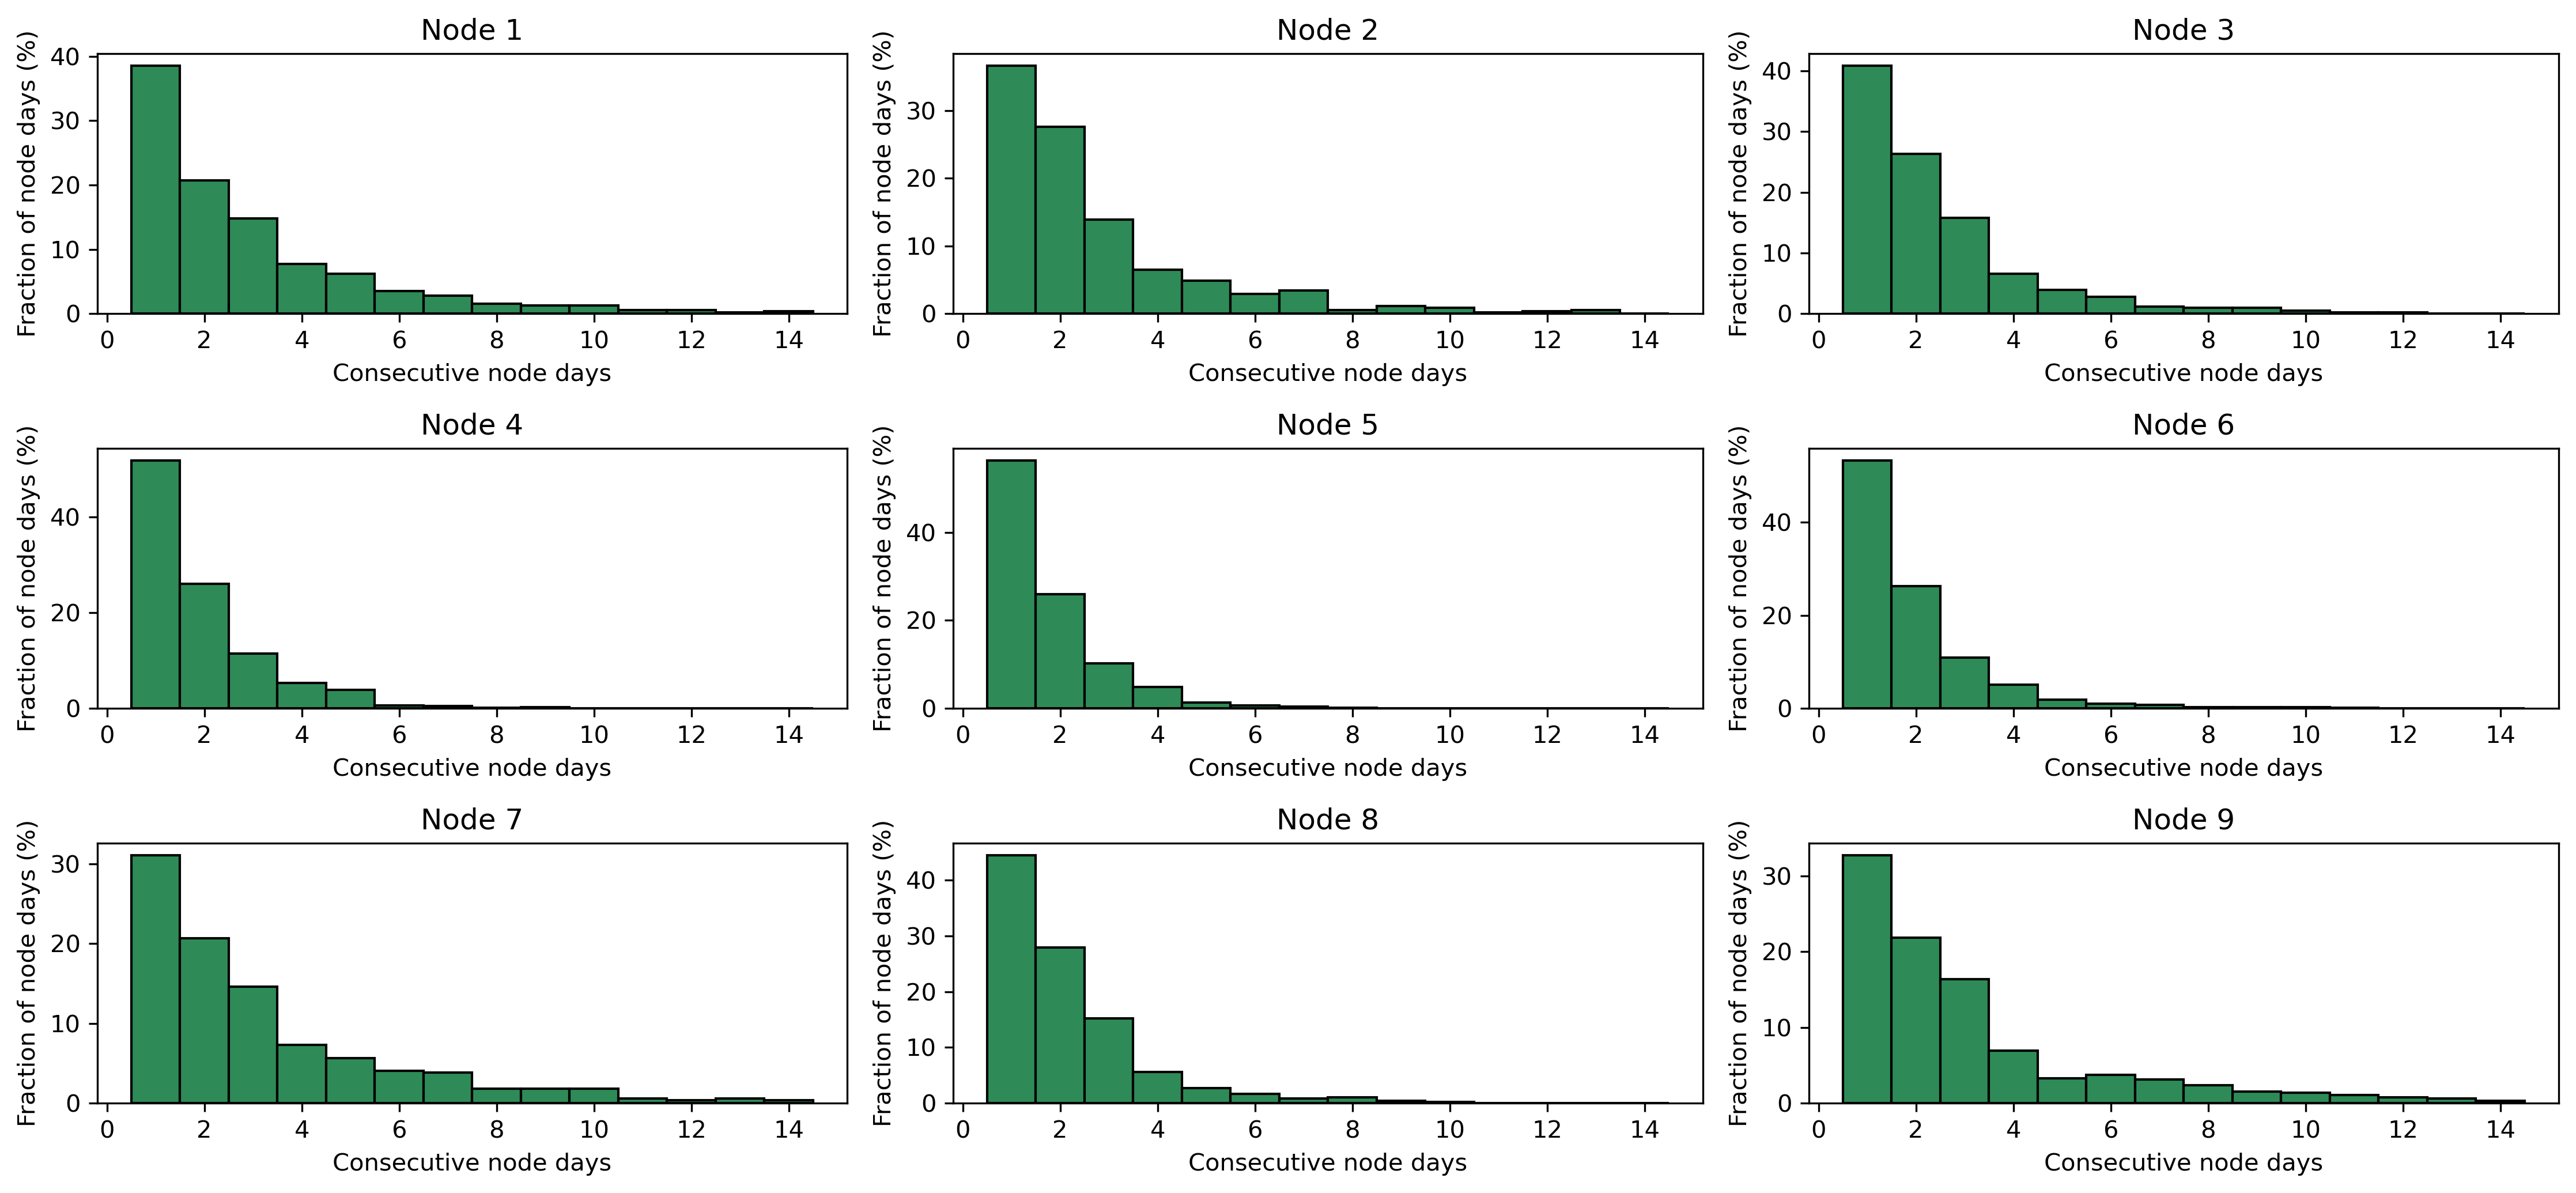

In [4]:
# length per node

all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
full_period = pd.date_range(start="1981-01-01", end="2020-12-31", freq="D")

f = plt.figure(figsize=(15,7), dpi=300)
for node in range(1,10):
    ax = f.add_subplot(3,3,node)
    ax.set_title('Node '+str(node))
    
    nod = all_node_file['node'+str(node)]
    exist_int = np.in1d(full_period,nod).astype(int)
    
    labels, numL = label(exist_int)

    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)
    
    u_plot.hist_freq(ax, n[1::], bins=np.arange(0.5,15), color='seagreen', ec='k')
    ax.set_xlabel('Consecutive node days')
    ax.set_ylabel('Fraction of node days (%)')
    
plt.tight_layout()

In [5]:
# import seaborn as sns
# colord = sns.color_palette("tab10", n_colors=9, desat=0.8)
colord = ['gold', 'limegreen', 'darkturquoise', 'darkorange', 'olive', 'blue', 'red', 'green', 'purple']

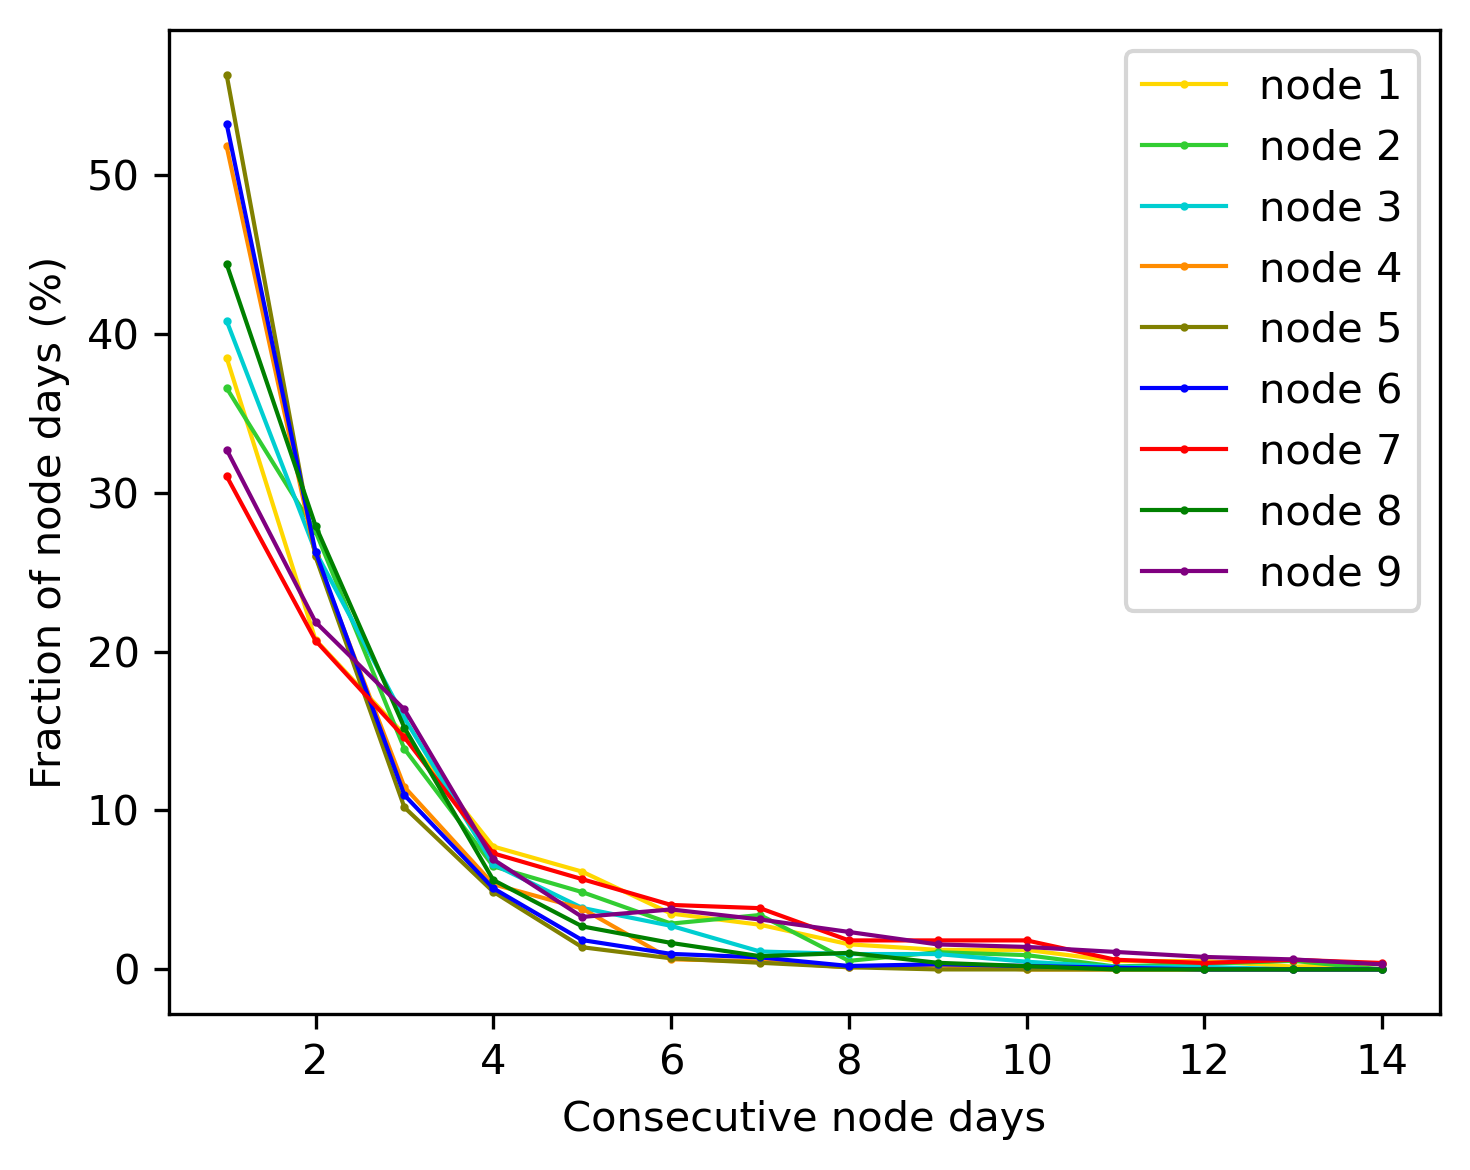

In [6]:
from utils import u_statistics as ustats
# length per node

all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
full_period = pd.date_range(start="1981-01-01", end="2020-12-31", freq="D")

f = plt.figure(figsize=(5,4), dpi=300)
ax = f.add_subplot(1,1,1)
for node in range(1,10):

    #ax.set_title('Node '+str(node))
    
    nod = all_node_file['node'+str(node)]
    exist_int = np.in1d(full_period,nod).astype(int)
    
    labels, numL = label(exist_int)

    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)
    
    hist, count, bins = ustats.histo_frequency(n[1::], bins=np.arange(0.5,15))
    bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
    
    plt.plot(bin_centre, hist, label='node '+str(node), linewidth=1, marker='o', markersize=1, color=colord[node-1])
    
plt.legend()
ax.set_xlabel('Consecutive node days')
ax.set_ylabel('Fraction of node days (%)')
    
plt.tight_layout()

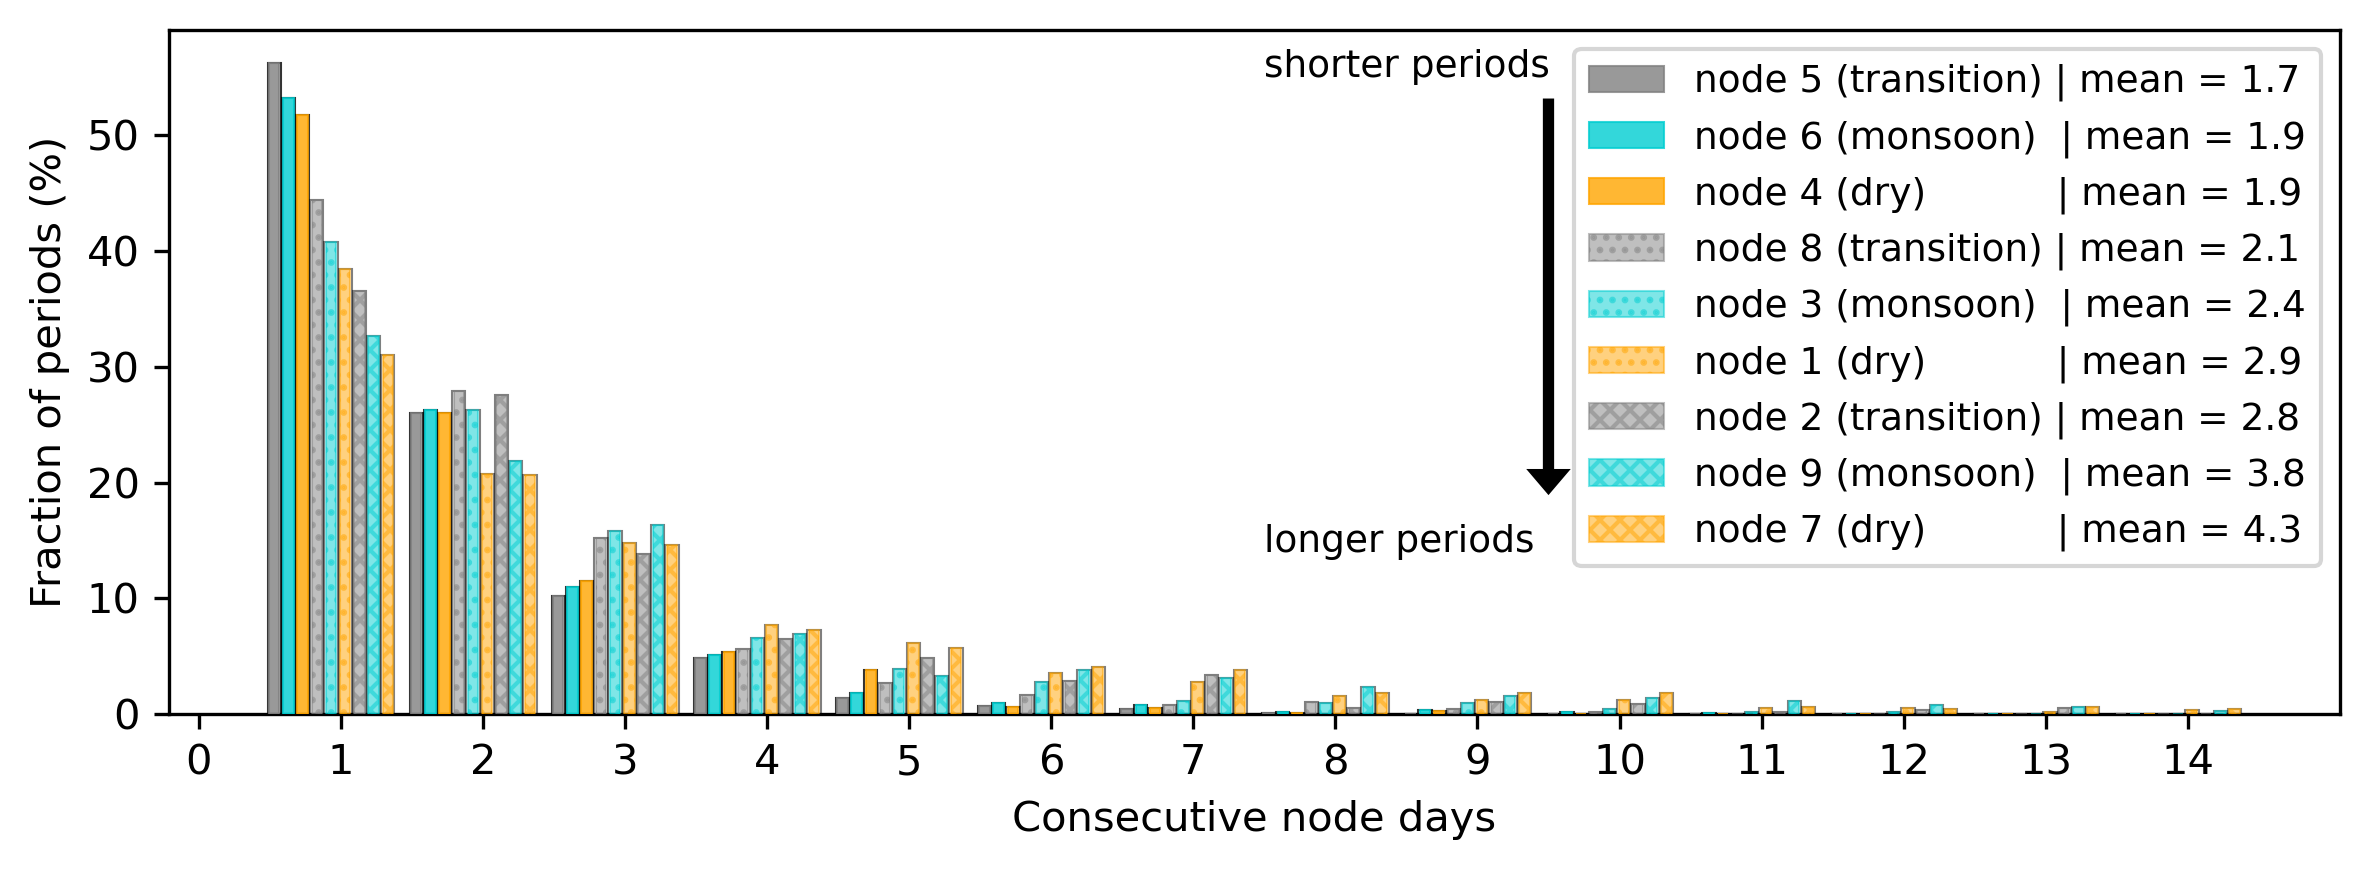

In [7]:
from utils import u_statistics as ustats
# length per node

all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
full_period = pd.date_range(start="1981-01-01", end="2020-12-31", freq="D")

colord = ['grey', 'darkturquoise', 'orange', 'grey', 'darkturquoise', 'orange', 'grey', 'darkturquoise', 'orange']

#colord = ['orange', 'limegreen', 'darkturquoise', 'red', 'olive', 'blue', 'darkred', 'green', 'purple']

plab = ['transition', 'monsoon', 'dry', 'transition', 'monsoon','dry', 'transition', 'monsoon', 'dry']
brac = ['', ' ', '          ','', ' ', '          ','', ' ', '          ']
hat = ['', '', '', '....', '....', '....','xxxxx', 'xxxxx', 'xxxxx']
alpha = [0.8,0.8,0.8,0.5,0.5,0.5, 0.5,0.5,0.5]

f = plt.figure(figsize=(8,3), dpi=300)
ax = f.add_subplot(1,1,1)

n_ord = [5,6,4,8,3,1,2,9,7]

for idx, node in enumerate(n_ord):

    #ax.set_title('Node '+str(node))
    
    nod = all_node_file['node'+str(node)]
    exist_int = np.in1d(full_period,nod).astype(int)
    
    labels, numL = label(exist_int)

    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)
    
    hist, count, bins = ustats.histo_frequency(n[1::], bins=np.arange(0.5,15))
    bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
    bin_edge = bins[0:-1]
    width = (bins[1::] - bins[0:-1])/12
    
    add = 0

    ax.bar(bin_edge+0.01+width+1/10*(idx-1)+add, hist,  zorder=99, edgecolor=colord[idx], hatch=hat[idx], alpha=alpha[idx], align='edge', width=width-0.01,  linewidth=0.5, color=colord[idx], label='node '+str(node)+' ('+plab[idx]+')'+brac[idx]+' | mean = '+str(np.round(np.mean(n[1::]),1))) #label='node '+str(node)+' ('+plab[idx]+')'+brac[idx]+' | mean = '+str(np.round(np.mean(n[1::]),1)),
    ax.bar(bin_edge+width+1/10*(idx-1)+add, hist,  edgecolor='k', alpha=alpha[idx], align='edge', width=width+0.01,  linewidth=0.5, color='white',zorder=1)
    ax.set_xticks(range(0,15))
    
plt.legend(loc='upper right', fontsize=9)
#add arrow to plot
plt.arrow(x=9.5, y=53, dx=0, dy=-32, width=.05, color='k', head_width=0.25, head_length=1.8) 

ax.set_xlabel('Consecutive node days')
ax.set_ylabel('Fraction of periods (%)')
ax.text(7.5,55, "shorter periods", fontsize=9)
ax.text(7.5,14, "longer periods", fontsize=9)
    
plt.tight_layout()
f.savefig(cnst.FIGS + 'SOMS/5-9N_3x3_fullYear/consecutive_nodeDay_lengthsComparison.pdf')

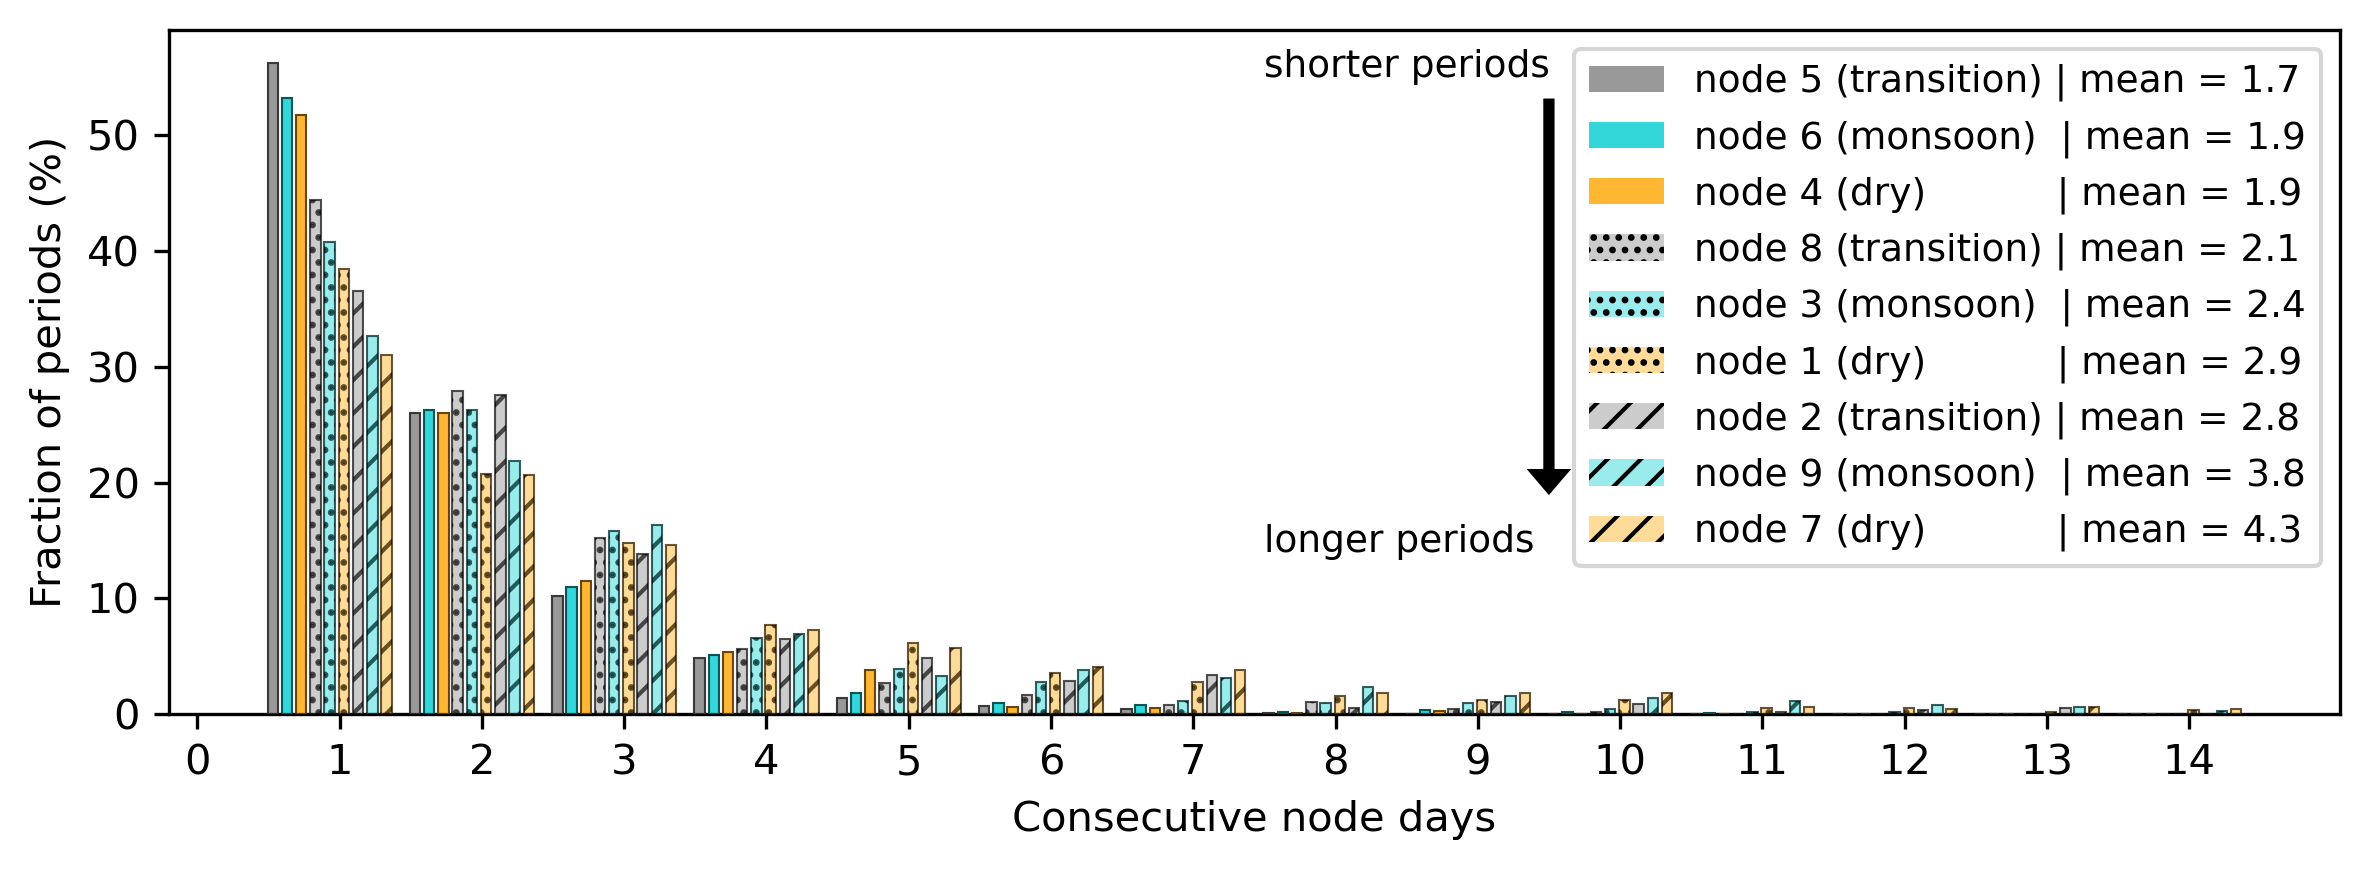

In [32]:
#updated colour
from utils import u_statistics as ustats
# length per node

all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
full_period = pd.date_range(start="1981-01-01", end="2020-12-31", freq="D")

colord = ['grey', 'darkturquoise', 'orange', 'grey', 'darkturquoise', 'orange', 'grey', 'darkturquoise', 'orange']

#colord = ['orange', 'limegreen', 'darkturquoise', 'red', 'olive', 'blue', 'darkred', 'green', 'purple']

plab = ['transition', 'monsoon', 'dry', 'transition', 'monsoon','dry', 'transition', 'monsoon', 'dry']
brac = ['', ' ', '          ','', ' ', '          ','', ' ', '          ']
#hat = ['', '', '', '....', '....', '....','xxxxx', 'xxxxx', 'xxxxx']
hat = ['', '', '', '....', '....', '....','///', '///', '///']

alpha = [0.8,0.8,0.8,0.4,0.4,0.4, 0.4,0.4,0.4]

f = plt.figure(figsize=(8,3), dpi=300)
ax = f.add_subplot(1,1,1)

n_ord = [5,6,4,8,3,1,2,9,7]

legend_list = []

for idx, node in enumerate(n_ord):

    #ax.set_title('Node '+str(node))
    
    nod = all_node_file['node'+str(node)]
    exist_int = np.in1d(full_period,nod).astype(int)
    
    labels, numL = label(exist_int)

    u, inv = np.unique(labels, return_inverse=True)
    n = np.bincount(inv)
    
    hist, count, bins = ustats.histo_frequency(n[1::], bins=np.arange(0.5,15))
    bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
    bin_edge = bins[0:-1]
    width = (bins[1::] - bins[0:-1])/12
    
    add = 0

    ax.bar(bin_edge+0.01+width+1/10*(idx-1)+add, hist,  zorder=98, edgecolor=colord[idx], hatch=hat[idx], alpha=alpha[idx], align='edge', width=width-0.01,  linewidth=0.5, color=colord[idx], label='node '+str(node)+' ('+plab[idx]+')'+brac[idx]+' | mean = '+str(np.round(np.mean(n[1::]),1))) #label='node '+str(node)+' ('+plab[idx]+')'+brac[idx]+' | mean = '+str(np.round(np.mean(n[1::]),1)),
    #ax.bar(bin_edge+width+1/10*(idx-1)+add, hist,  edgecolor='k', alpha=alpha[idx], align='edge', width=width+0.01,  linewidth=0.5, color='none',zorder=1)
    ax.bar(bin_edge+0.01+width+1/10*(idx-1)+add, hist,  zorder=99, edgecolor='k', hatch=hat[idx], alpha=0.6, align='edge', width=width-0.01,  linewidth=0.5, color='none')
    ax.set_xticks(range(0,15))
    
    circ = mpatches.Patch( facecolor=colord[idx],alpha=alpha[idx],hatch=hat[idx],label='node '+str(node)+' ('+plab[idx]+')'+brac[idx]+' | mean = '+str(np.round(np.mean(n[1::]),1)))
    legend_list.append(circ)
    
#plt.legend(loc='upper right', fontsize=9)
ax.legend(handles = legend_list,loc=1, fontsize=9)

#add arrow to plot
plt.arrow(x=9.5, y=53, dx=0, dy=-32, width=.05, color='k', head_width=0.25, head_length=1.8) 

ax.set_xlabel('Consecutive node days')
ax.set_ylabel('Fraction of periods (%)')
ax.text(7.5,55, "shorter periods", fontsize=9)
ax.text(7.5,14, "longer periods", fontsize=9)
    
plt.tight_layout()
f.savefig(cnst.FIGS + 'SOMS/5-9N_3x3_fullYear/consecutive_nodeDay_lengthsComparison_updated.pdf')

In [8]:
def get_neighbour_node(before=False, after=True):

    all_node_file = pkl.load(open(cnst.network_data + 'data/SOMS/saves/3x3_Nodes_fullYear/node_days.p', "rb"))
    full_period = pd.date_range(start="1981-01-01", end="2020-12-31", freq="D")

    n_ord = range(1,10)

    # follow_1 = []
    # follow_5 = []
    # follow_7 = []
    n_struc = {}

    for idx, node in enumerate(n_ord):


        neighbour = []
        nod = all_node_file['node'+str(node)]
        exist_int = np.in1d(full_period,nod).astype(int)

        labels, numL = label(exist_int)

        u, inv = np.unique(labels, return_inverse=True)
        n = np.bincount(inv)

        inds = u[(n>=1)&(u!=0)]

        shift_time = 1


        if before:
            if len(inds)>0:
                for i in inds:
                    pos = np.where(labels==i)
                    try:
                        neighbour.append(full_period[pos[0][0]-1])
                    except:
                        print('end of time series, no neighbour')
                        continue

        if after:
            if len(inds)>0:
                for i in inds:
                    pos = np.where(labels==i)
                    try:
                        neighbour.append(full_period[pos[0][-1]+1])
                    except:
                        print('end of time series, no neighbour')
                        continue


        ### which neighbour node?

        which_node = []
        nrange = range(1,10)
        for neigh in neighbour:
            for idp, nn in enumerate(nrange):

                #ax.set_title('Node '+str(node))

                check = all_node_file['node'+str(nn)]

                if neigh in check:
                    which_node.append(nn)

        n_struc[node] = which_node
        
    return n_struc


    ###########for different node lengths    
    #     inds_1 = u[(n>=1)&(n<=2)&(u!=0)
    #     inds_3 = u[(n>2)&(n<=4)&(u!=0)]
    #     inds_4 = u[(n>4)&(u!=0)] 

    #     del_time = 1

    #     if len(inds_1)>0:
    #         for i in inds_1:
    #             pos = np.where(labels==i)
    #             follow_1.append(full_period[pos[0][0]-1])

    #     if len(inds_3)>0:
    #         for i in inds_3:
    #             pos = np.where(labels==i)
    #             follow_5.append(full_period[pos[0][0]-1])

    #     if len(inds_5)>0:
    #         for i in inds_5:
    #             pos = np.where(labels==i)
    #             follow_7.append(full_period[pos[0][0]-1])


In [9]:
pre = get_neighbour_node(before=True)

end of time series, no neighbour


In [10]:
post = get_neighbour_node(after=True)

end of time series, no neighbour


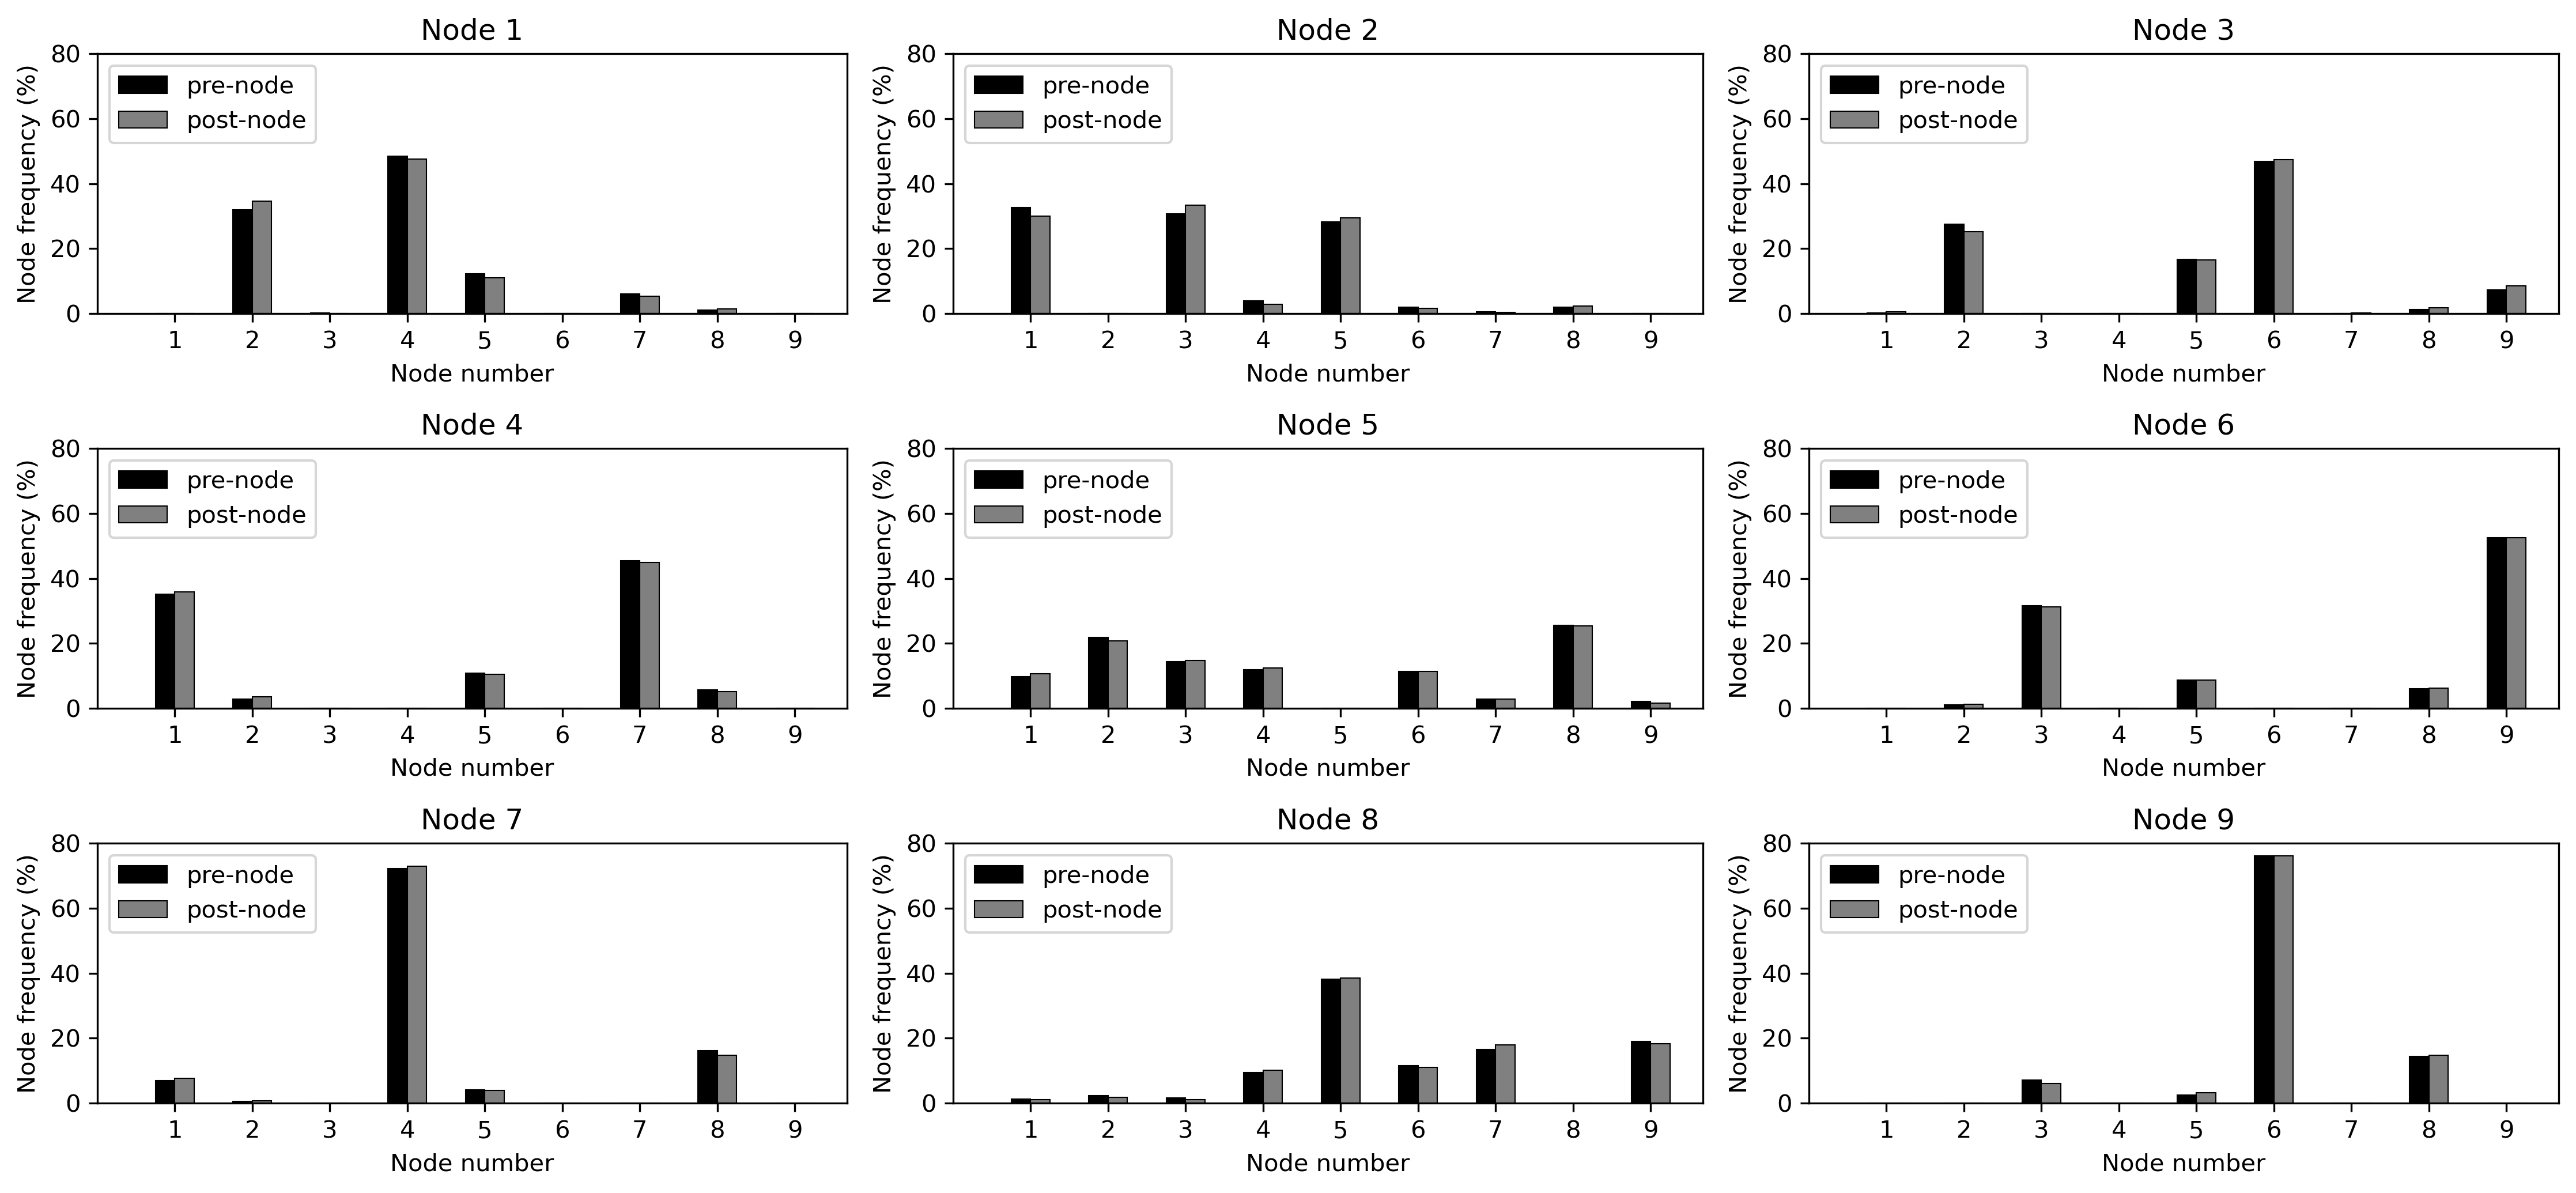

In [12]:
f = plt.figure(figsize=(15,7), dpi=300)
for node in range(1,10):
    
    post_node = post[node]
    pre_node = pre[node]
    
    ax = f.add_subplot(3,3,node)
    ax.set_title('Node '+str(node))
    
    
        
    hist_post, count_post, bins = ustats.histo_frequency(post_node, bins=np.arange(0.5,10))
    hist_pre, count_pre, bins = ustats.histo_frequency(pre_node, bins=np.arange(0.5,10))
    
    bin_centre = bins[0:-1] + ((bins[1::] - bins[0:-1]) / 2)
    bin_edge = bins[0:-1]
    width = (bins[1::] - bins[0:-1])/4
    
    
    ax.bar(bin_edge+width, hist_pre, label='pre-node', edgecolor='k', align='edge', width=width, color='k', linewidth=0.5)
    ax.bar(bin_edge+2*width, hist_post, label='post-node', edgecolor='k', align='edge', width=width, color='grey', linewidth=0.5)
    ax.set_xticks(range(0,10))
    
    ax.set_xlabel('Node number')
    ax.set_ylabel('Node frequency (%)')
    ax.set_xticks(np.arange(1,10))
    plt.legend(loc='upper left')
    ax.set_ylim(0,80)
    
#f.subplots_adjust(left=0.05, top=0.95)
#plt.arrow(x=9.5, y=53, dx=0, dy=-32, width=.05, color='k', head_width=0.25, head_length=1.8) 

plt.tight_layout()
#f.savefig(cnst.FIGS + 'SOMS/5-9N_3x3_fullYear/pre-postNode_analysis.jpg')